Import libraries requred for the script

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy.polynomial import polynomial as npp
from scipy.stats import linregress

Read the CSV files

In [2]:
df_pa = pd.read_csv('VMI_Data_PA_V02_AK6_mod.csv')
df_bp1 = pd.read_csv('VMI_Data_BP1_V02_AK6_mod.csv')
df_bp2 = pd.read_csv('VMI_Data_BP2_V02_AK6_mod.csv')

Check the columns in the data

In [3]:
print(df_pa.columns)
print(df_bp1.columns)
print(df_bp2.columns)

Index(['ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPL

Check missing data

In [4]:
total = df_pa.isnull().sum().sort_values(ascending=False)
percent = (df_pa.isnull().sum()/df_pa.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
df_pa = df_pa.dropna()

total = df_bp1.isnull().sum().sort_values(ascending=False)
percent = (df_bp1.isnull().sum()/df_bp1.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
df_bp1 = df_bp1.dropna()

total = df_bp2.isnull().sum().sort_values(ascending=False)
percent = (df_bp2.isnull().sum()/df_bp2.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
df_bp2 = df_bp2.dropna()

                    Total   Percent
RHT_SPLICE_SLOPE50      1  0.000823
MID_SPLICE_SLOPE20      1  0.000823
LFT_SPLICE_SLOPE5       1  0.000823
LFT_SPLICE_SLOPE10      1  0.000823
LFT_SPLICE_SLOPE20      1  0.000823
LFT_SPLICE_SLOPE50      1  0.000823
LFT_SPLICE_PREV         1  0.000823
MID_SPLICE_PREV         1  0.000823
RHT_SPLICE_SLOPE20      1  0.000823
MID_SPLICE_SLOPE5       1  0.000823
MID_SPLICE_SLOPE10      1  0.000823
MID_SPLICE_SLOPE50      1  0.000823
RHT_SPLICE_PREV         1  0.000823
RHT_SPLICE_SLOPE5       1  0.000823
RHT_SPLICE_SLOPE10      1  0.000823
PA_S8_L                 0  0.000000
PA_S3_L                 0  0.000000
PA_S4_L                 0  0.000000
PA_S5_L                 0  0.000000
PA_S6_L                 0  0.000000
                    Total   Percent
RHT_SPLICE_SLOPE50      1  0.000845
MID_SPLICE_SLOPE20      1  0.000845
LFT_SPLICE_SLOPE5       1  0.000845
LFT_SPLICE_SLOPE10      1  0.000845
LFT_SPLICE_SLOPE20      1  0.000845
LFT_SPLICE_SLOPE50      1  0

In [5]:
total = df_pa.isnull().sum().sort_values(ascending=False)
percent = (df_pa.isnull().sum()/df_pa.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

total = df_bp1.isnull().sum().sort_values(ascending=False)
percent = (df_bp1.isnull().sum()/df_bp1.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

total = df_bp2.isnull().sum().sort_values(ascending=False)
percent = (df_bp2.isnull().sum()/df_bp2.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

                    Total  Percent
RHT_SPLICE_SLOPE50      0      0.0
RHT_SPLICE_SLOPE20      0      0.0
PA_PART                 0      0.0
PA_S8_R                 0      0.0
PA_S7_R                 0      0.0
PA_S6_R                 0      0.0
PA_S5_R                 0      0.0
PA_S4_R                 0      0.0
PA_S3_R                 0      0.0
PA_S2_R                 0      0.0
PA_S1_MR                0      0.0
PA_S1_ML                0      0.0
PA_S2_L                 0      0.0
PA_S3_L                 0      0.0
PA_S4_L                 0      0.0
PA_S5_L                 0      0.0
PA_S6_L                 0      0.0
PA_S7_L                 0      0.0
PA_S8_L                 0      0.0
SPLICE_OK               0      0.0
                    Total  Percent
RHT_SPLICE_SLOPE50      0      0.0
RHT_SPLICE_SLOPE20      0      0.0
BP1_PART                0      0.0
BP1_S8_R                0      0.0
BP1_S7_R                0      0.0
BP1_S6_R                0      0.0
BP1_S5_R            

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CUT_LENGTH'].skew())
print("Kurtosis: %f" % df_pa['CUT_LENGTH'].kurt())

Skewness: -74.471378
Kurtosis: 8529.405419


In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CONV_WAIT_TIME'].skew())
print("Kurtosis: %f" % df_pa['CONV_WAIT_TIME'].kurt())

Skewness: 31.310088
Kurtosis: 1464.457010


In [8]:
df_pa['LFT_SPLICE_LENGTH'].describe()

count    121482.000000
mean          7.347938
std           2.141163
min         -13.438310
25%           5.980868
50%           7.304719
75%           8.653042
max          34.460590
Name: LFT_SPLICE_LENGTH, dtype: float64

In [9]:
df_pa['MID_SPLICE_LENGTH'].describe()

count    121482.000000
mean         17.108619
std           5.754209
min         -34.990450
25%          15.803170
50%          16.529940
75%          17.254980
max          88.384550
Name: MID_SPLICE_LENGTH, dtype: float64

In [10]:
df_pa['RHT_SPLICE_LENGTH'].describe()

count    121482.000000
mean          7.167648
std           2.165504
min         -58.815900
25%           5.844553
50%           7.094705
75%           8.445475
max          47.205240
Name: RHT_SPLICE_LENGTH, dtype: float64

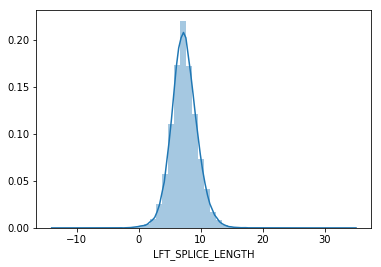

In [11]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_LENGTH']);

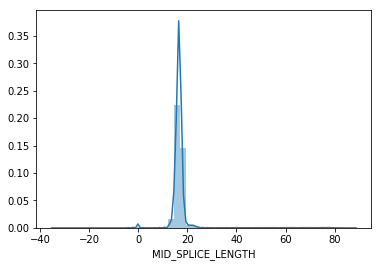

In [12]:
#histogram
sns.distplot(df_pa['MID_SPLICE_LENGTH']);

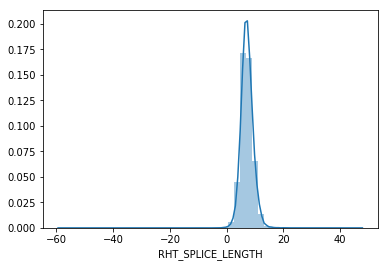

In [13]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_LENGTH']);

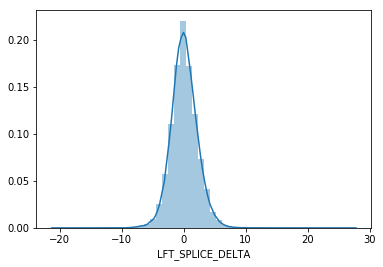

In [14]:
#histogram
sns.distplot(df_pa['LFT_SPLICE_DELTA']);

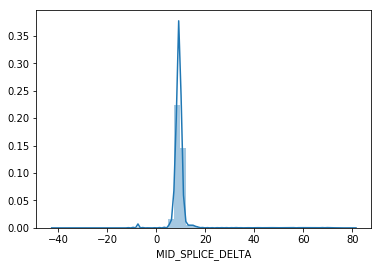

In [15]:
#histogram
sns.distplot(df_pa['MID_SPLICE_DELTA']);

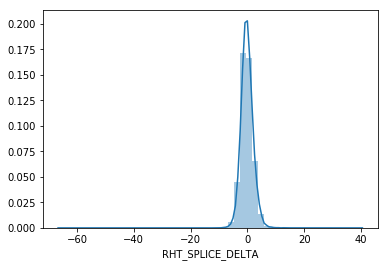

In [16]:
#histogram
sns.distplot(df_pa['RHT_SPLICE_DELTA']);

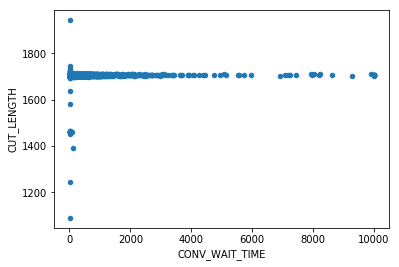

In [17]:
#scatter plot
var = 'CONV_WAIT_TIME'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

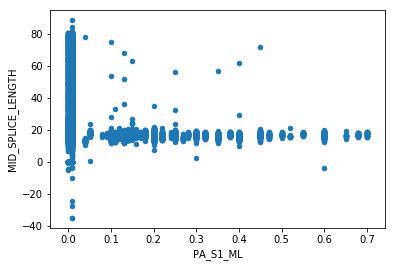

In [18]:
#scatter plot
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='MID_SPLICE_LENGTH');

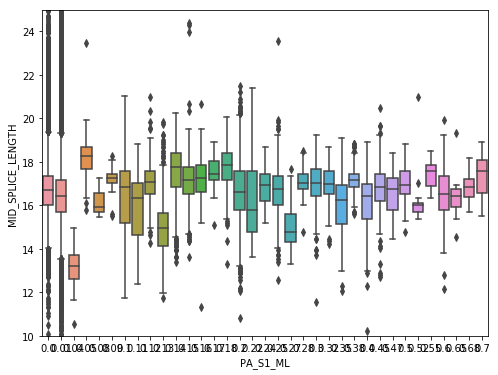

In [19]:
#box plot
var = 'PA_S1_ML'
data = pd.concat([df_pa['MID_SPLICE_LENGTH'], df_pa[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MID_SPLICE_LENGTH", data=data)
fig.axis(ymin=10, ymax=25);

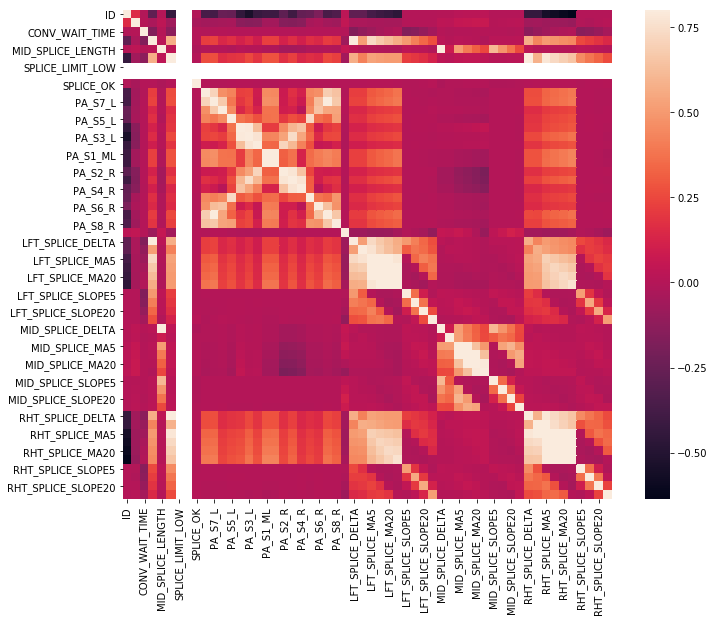

In [20]:
#correlation matrix
corrmat = df_pa.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

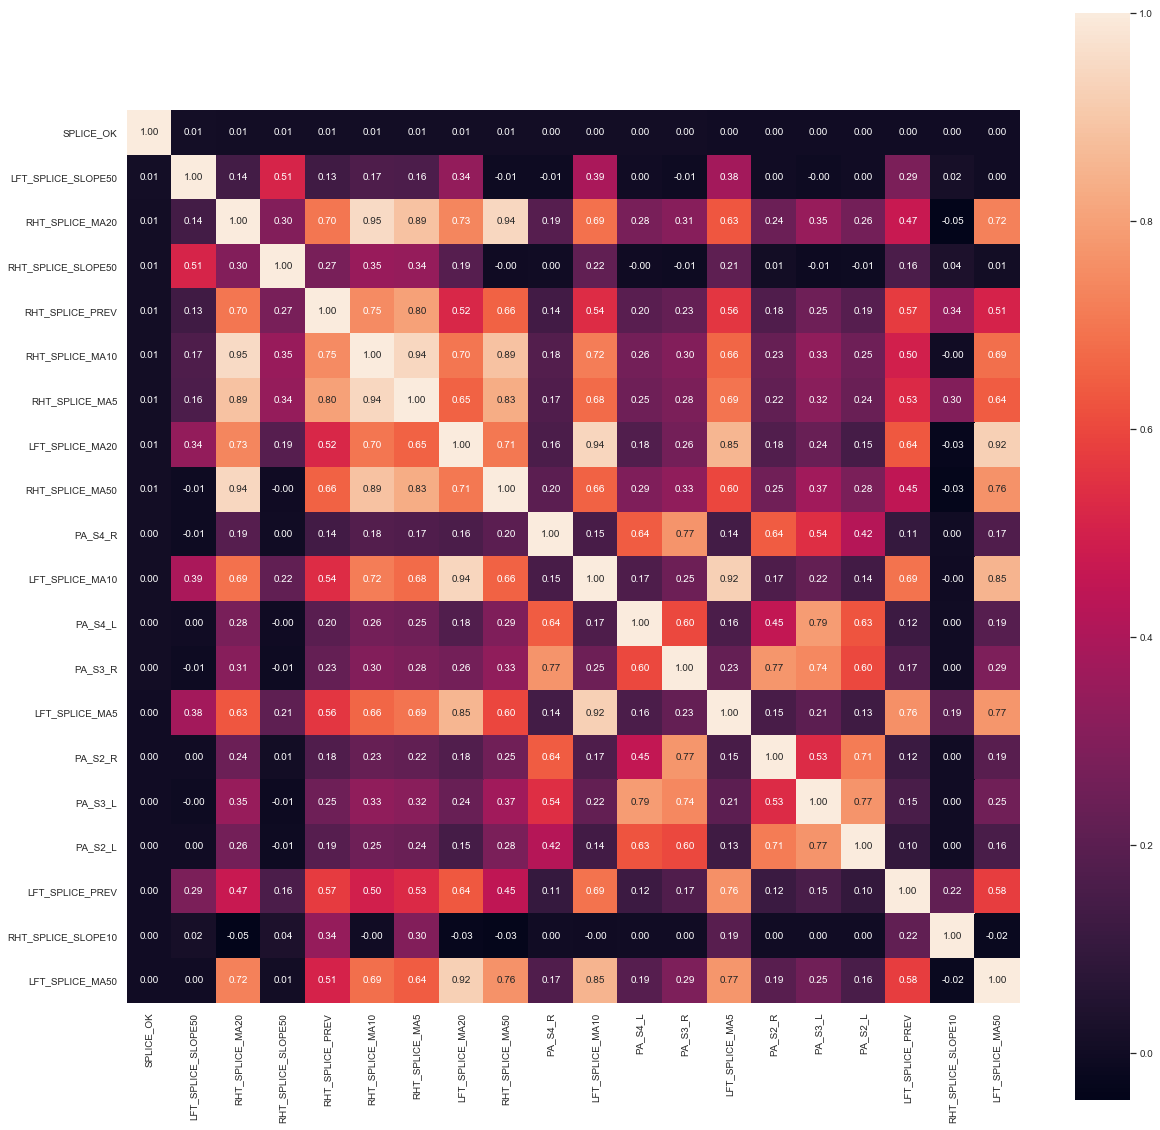

In [21]:
# correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SPLICE_OK')['SPLICE_OK'].index
cm = np.corrcoef(df_pa[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
df_pa.columns

Index(['ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPL

In [23]:
#scatterplot
#sns.set()
#cols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 
#        'LFT_SPLICE_DELTA', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
#        'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'MID_SPLICE_LENGTH', 
#        'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L',
#        'PA_S6_L', 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L',
#        'PA_S1_ML', 'PA_S1_MR', 'PA_S2_R', 'PA_S3_R', 'PA_S4_R',
#        'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R']
#sns.pairplot(df_pa[cols], size = 2.5)
#plt.show();
#sns.pairplot(df_pa)

In [24]:
# 'ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
# 'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
# 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
# 'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
# 'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
# 'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
# 'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
# 'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
# 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
# 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
# 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
# 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
# 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
# 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
# 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
# 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
# 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'

data = []
for f in df_pa.columns:
    # Defining the role
    if f == 'SPLICE_OK':
        role = 'target'
    elif f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
               'SPLICE_LIMIT_HIGH','PA_PART','PA_BARCODE', 'PA_BUILD_DATE','PA_MACHINEID']:
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if f == 'SPLICE_OK':
        opType = 'binary'
    elif f == 'DATE_TIME_STAMP':
        opType = 'timestamp'
    elif df_pa[f].dtype == object:
        opType = 'nominal'
    elif df_pa[f].dtype == bool:
        opType = 'binary'
    elif df_pa[f].dtype == int:
        opType = 'interval'
    elif df_pa[f].dtype == float:
        opType = 'interval'
    else :
        opType = 'interval'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
               'SPLICE_LIMIT_HIGH','PA_PART','PA_BARCODE', 'PA_BUILD_DATE','PA_MACHINEID']:
        keep = False
    
    # Defining the data type 
    dtype = df_pa[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': opType,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [25]:
meta

,role,level,keep,dtype
varname,,,,
ID,id,interval,False,int64
MACHINE_ID,id,nominal,False,object
DATE_TIME_STAMP,id,timestamp,False,object
GT_BARCODE,id,nominal,False,object
TIRE_TYPE,id,nominal,False,object
CUT_LENGTH,input,interval,True,float64
CONV_WAIT_TIME,input,interval,True,float64
LFT_SPLICE_LENGTH,input,interval,True,float64
MID_SPLICE_LENGTH,input,interval,True,float64


In [26]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index([], dtype='object', name='varname')

In [27]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,interval,3
1,id,nominal,7
2,id,timestamp,1
3,input,interval,52
4,target,binary,1


In [28]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
df_pa[v].describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,PA_S8_L,PA_S7_L,PA_S6_L,PA_S5_L,PA_S4_L,...,RHT_SPLICE_DELTA,RHT_SPLICE_PREV,RHT_SPLICE_MA5,RHT_SPLICE_MA10,RHT_SPLICE_MA20,RHT_SPLICE_MA50,RHT_SPLICE_SLOPE5,RHT_SPLICE_SLOPE10,RHT_SPLICE_SLOPE20,RHT_SPLICE_SLOPE50
count,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,...,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000,121482.000000
mean,1707.139695,39.837300,7.347938,17.108619,7.167648,0.007799,0.008896,0.032038,0.039561,0.280145,...,-0.082352,-0.082297,-0.082256,-0.082153,-0.081975,-0.081500,-0.000054,-0.000043,-0.000040,-0.000028
std,3.966523,175.027846,2.141163,5.754209,2.165504,0.031613,0.035187,0.037607,0.116772,0.147404,...,2.165504,2.165502,1.720102,1.624211,1.549175,1.467594,0.512101,0.200960,0.087208,0.030121
min,1089.281000,4.799000,-13.438310,-34.990450,-58.815900,0.000000,0.000000,0.000000,0.000000,0.000000,...,-66.065900,-66.065900,-14.786672,-8.953346,-6.346968,-4.770777,-13.110264,-3.294169,-0.885462,-0.830416
25%,1706.351000,5.112000,5.980868,15.803170,5.844553,0.000000,0.000000,0.020000,0.010000,0.200000,...,-1.405447,-1.405447,-1.231815,-1.176908,-1.128953,-1.081259,-0.294243,-0.119799,-0.053060,-0.017320
50%,1707.358000,6.847000,7.304719,16.529940,7.094705,0.000000,0.000000,0.020000,0.010000,0.300000,...,-0.155295,-0.155295,-0.214369,-0.234860,-0.251143,-0.278447,-0.010422,-0.005425,-0.001728,0.000516
75%,1708.236000,21.506000,8.653042,17.254980,8.445475,0.000000,0.000000,0.040000,0.030000,0.300000,...,1.195475,1.195475,0.926098,0.853969,0.796667,0.722189,0.280604,0.115903,0.052137,0.018106
max,1943.112000,10000.010000,34.460590,88.384550,47.205240,0.200000,0.500000,0.690000,1.000000,1.000000,...,39.955240,39.955240,11.974854,10.886438,10.279938,7.978172,12.788060,3.404250,0.847566,0.446153


In [29]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
df_pa[v].describe()

,SPLICE_OK
count,121482.000000
mean,0.000255
std,0.015972
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [30]:
df_pa.columns

Index(['ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPL

In [31]:
df_pa.CUT_LENGTH.describe()

count    121482.000000
mean       1707.139695
std           3.966523
min        1089.281000
25%        1706.351000
50%        1707.358000
75%        1708.236000
max        1943.112000
Name: CUT_LENGTH, dtype: float64

In [32]:
#standardizing data
cut_length_scaled = StandardScaler().fit_transform(df_pa['CUT_LENGTH'][:,np.newaxis]);
low_range = cut_length_scaled[cut_length_scaled[:,0].argsort()][:10]
high_range= cut_length_scaled[cut_length_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-155.76897937]
 [-116.96758233]
 [ -79.66145569]
 [ -64.56605688]
 [ -62.37647276]
 [ -62.21360905]
 [ -62.03687923]
 [ -61.89317596]
 [ -61.78275133]
 [ -61.74922057]]

outer range (high) of the distribution:
[[ 3.24449347]
 [ 3.5197987 ]
 [ 3.73207617]
 [ 3.89166244]
 [ 4.40672523]
 [ 4.68556   ]
 [ 5.20869035]
 [ 7.2616303 ]
 [ 9.74013364]
 [59.49121604]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


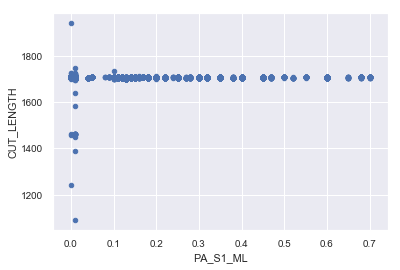

In [33]:
#bivariate analysis
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

In [34]:
#deleting points
df_pa.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] > 1720].index)
df_pa = df_pa.drop(df_pa[df_pa['CUT_LENGTH'] < 1660].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


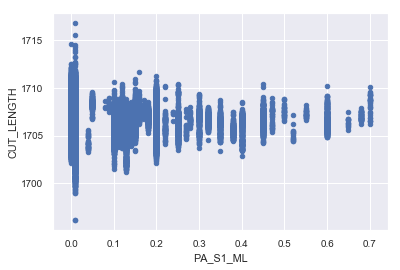

In [35]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S1_ML'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


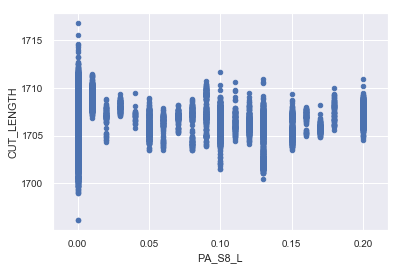

In [36]:
#bivariate analysis saleprice/grlivarea
var = 'PA_S8_L'
data = pd.concat([df_pa['CUT_LENGTH'], df_pa[var]], axis=1)
data.plot.scatter(x=var, y='CUT_LENGTH');

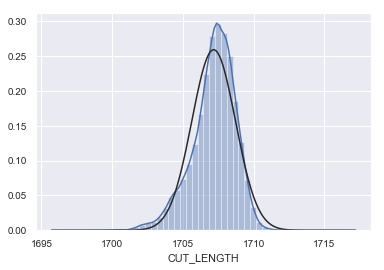

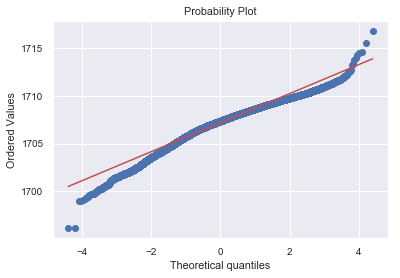

In [37]:
#histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH'], plot=plt)

In [38]:
#applying log transformation
df_pa['CUT_LENGTH_LOG'] = np.log(df_pa['CUT_LENGTH'])

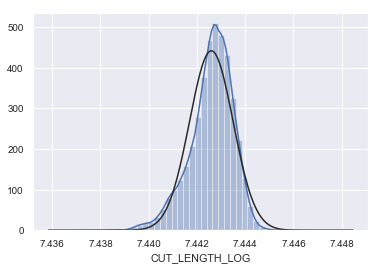

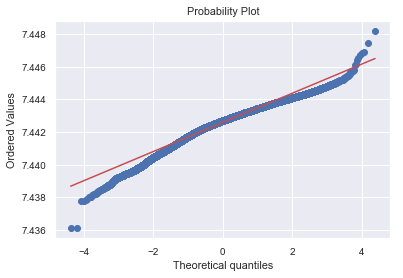

In [39]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['CUT_LENGTH_LOG'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['CUT_LENGTH_LOG'], plot=plt)

In [40]:
df_pa = df_pa.drop('CUT_LENGTH_LOG',1)

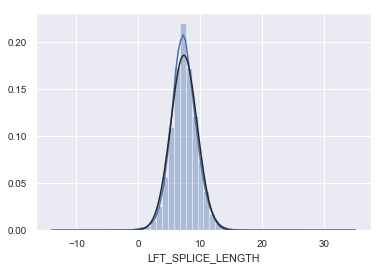

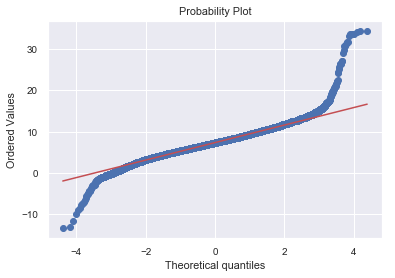

In [41]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['LFT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['LFT_SPLICE_LENGTH'], plot=plt)

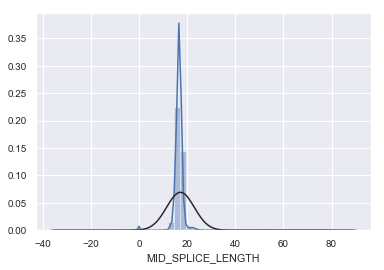

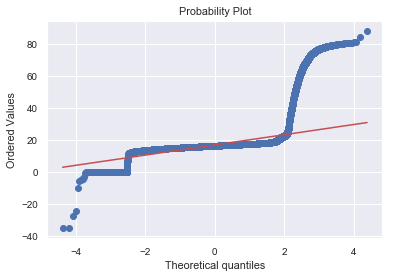

In [42]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['MID_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['MID_SPLICE_LENGTH'], plot=plt)

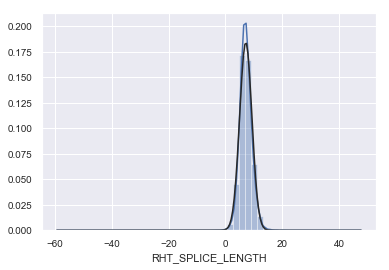

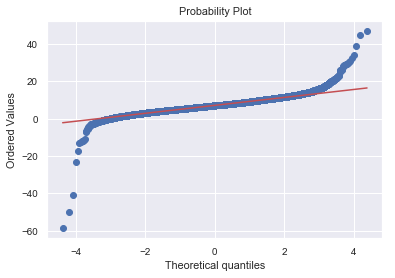

In [43]:
#transformed histogram and normal probability plot
sns.distplot(df_pa['RHT_SPLICE_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_pa['RHT_SPLICE_LENGTH'], plot=plt)

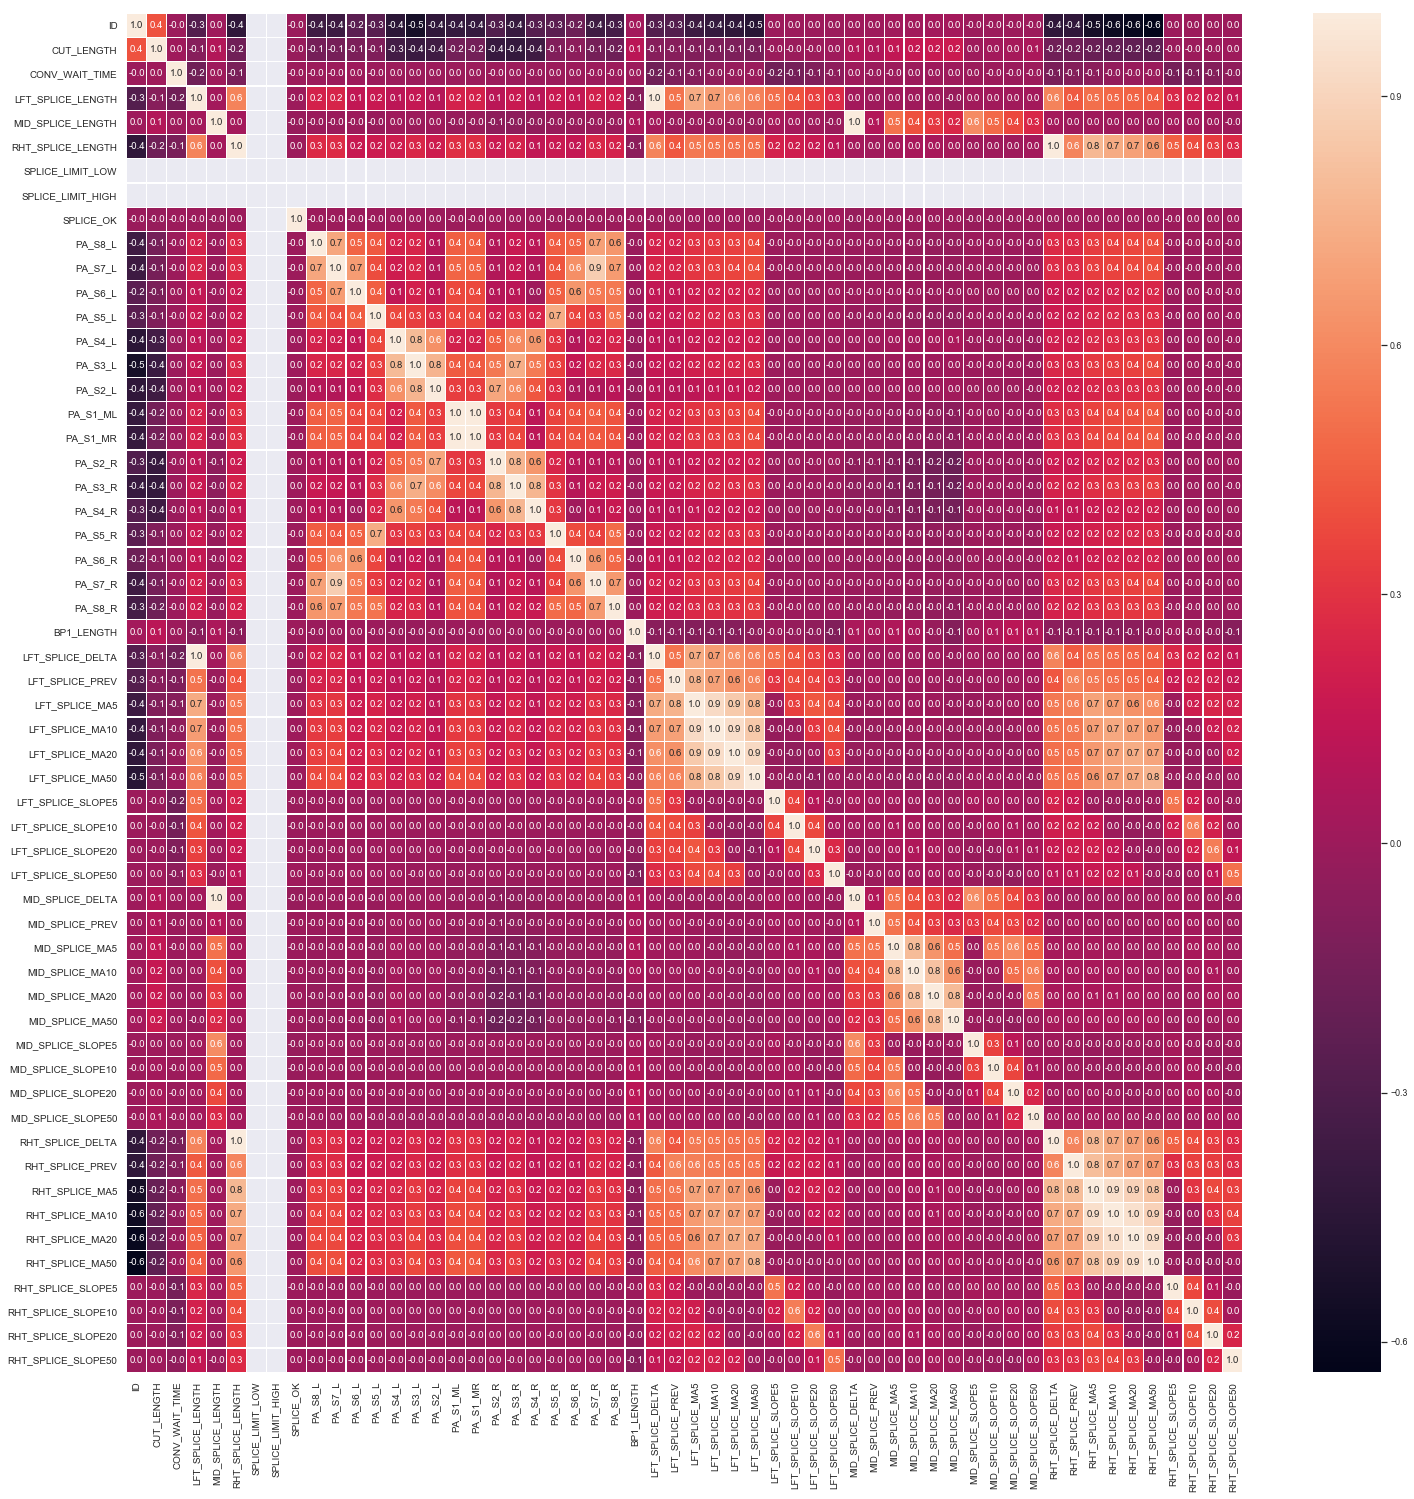

In [44]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.8)
sns.heatmap(df_pa.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()

In [45]:
bins = [df_pa['LFT_SPLICE_LENGTH'].min(),df_pa['SPLICE_LIMIT_LOW'].iloc[0],
        (df_pa['LFT_SPLICE_LENGTH'].mean()-df_pa['LFT_SPLICE_LENGTH'].std()),
        df_pa['LFT_SPLICE_LENGTH'].mean(),(df_pa['LFT_SPLICE_LENGTH'].mean()+df_pa['LFT_SPLICE_LENGTH'].std()),
        df_pa['SPLICE_LIMIT_HIGH'].iloc[0],df_pa['LFT_SPLICE_LENGTH'].max()]


In [46]:
df_pa.columns

Index(['ID', 'MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_LIMIT_LOW',
       'SPLICE_LIMIT_HIGH', 'SPLICE_OK', 'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
       'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
       'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
       'PA_S8_R', 'PA_PART', 'PA_BARCODE', 'BP1_LENGTH', 'PA_BUILD_DATE',
       'PA_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPL

In [47]:
bins

[-13.43831,
 3.5,
 5.206679983714121,
 7.347980192349963,
 9.489280400985805,
 11,
 34.46059]

In [48]:
bin_names=['Bad','OK','Good','GoodH','OKH','BadH']

In [49]:
bin_names

['Bad', 'OK', 'Good', 'GoodH', 'OKH', 'BadH']

In [50]:
df_pa['LFT_SPLICE_GRADE'] = pd.cut(df_pa['LFT_SPLICE_LENGTH'],bins, labels=bin_names, include_lowest=True).str.replace('H','')
#df_pa['LFT_SPLICE_GRADE'] = pd.cut(df_pa['LFT_SPLICE_LENGTH'],bins, include_lowest=True)

In [51]:
#df_pa['LFT_SPLICE_GRADE']
one_hot=pd.get_dummies(df_pa['LFT_SPLICE_GRADE'])
df_pa = df_pa.drop('LFT_SPLICE_GRADE', axis = 1)
df_pa = df_pa.join(one_hot)
#df_a.join(df_b, on='mukey', how='left', lsuffix='_left', rsuffix='_right')



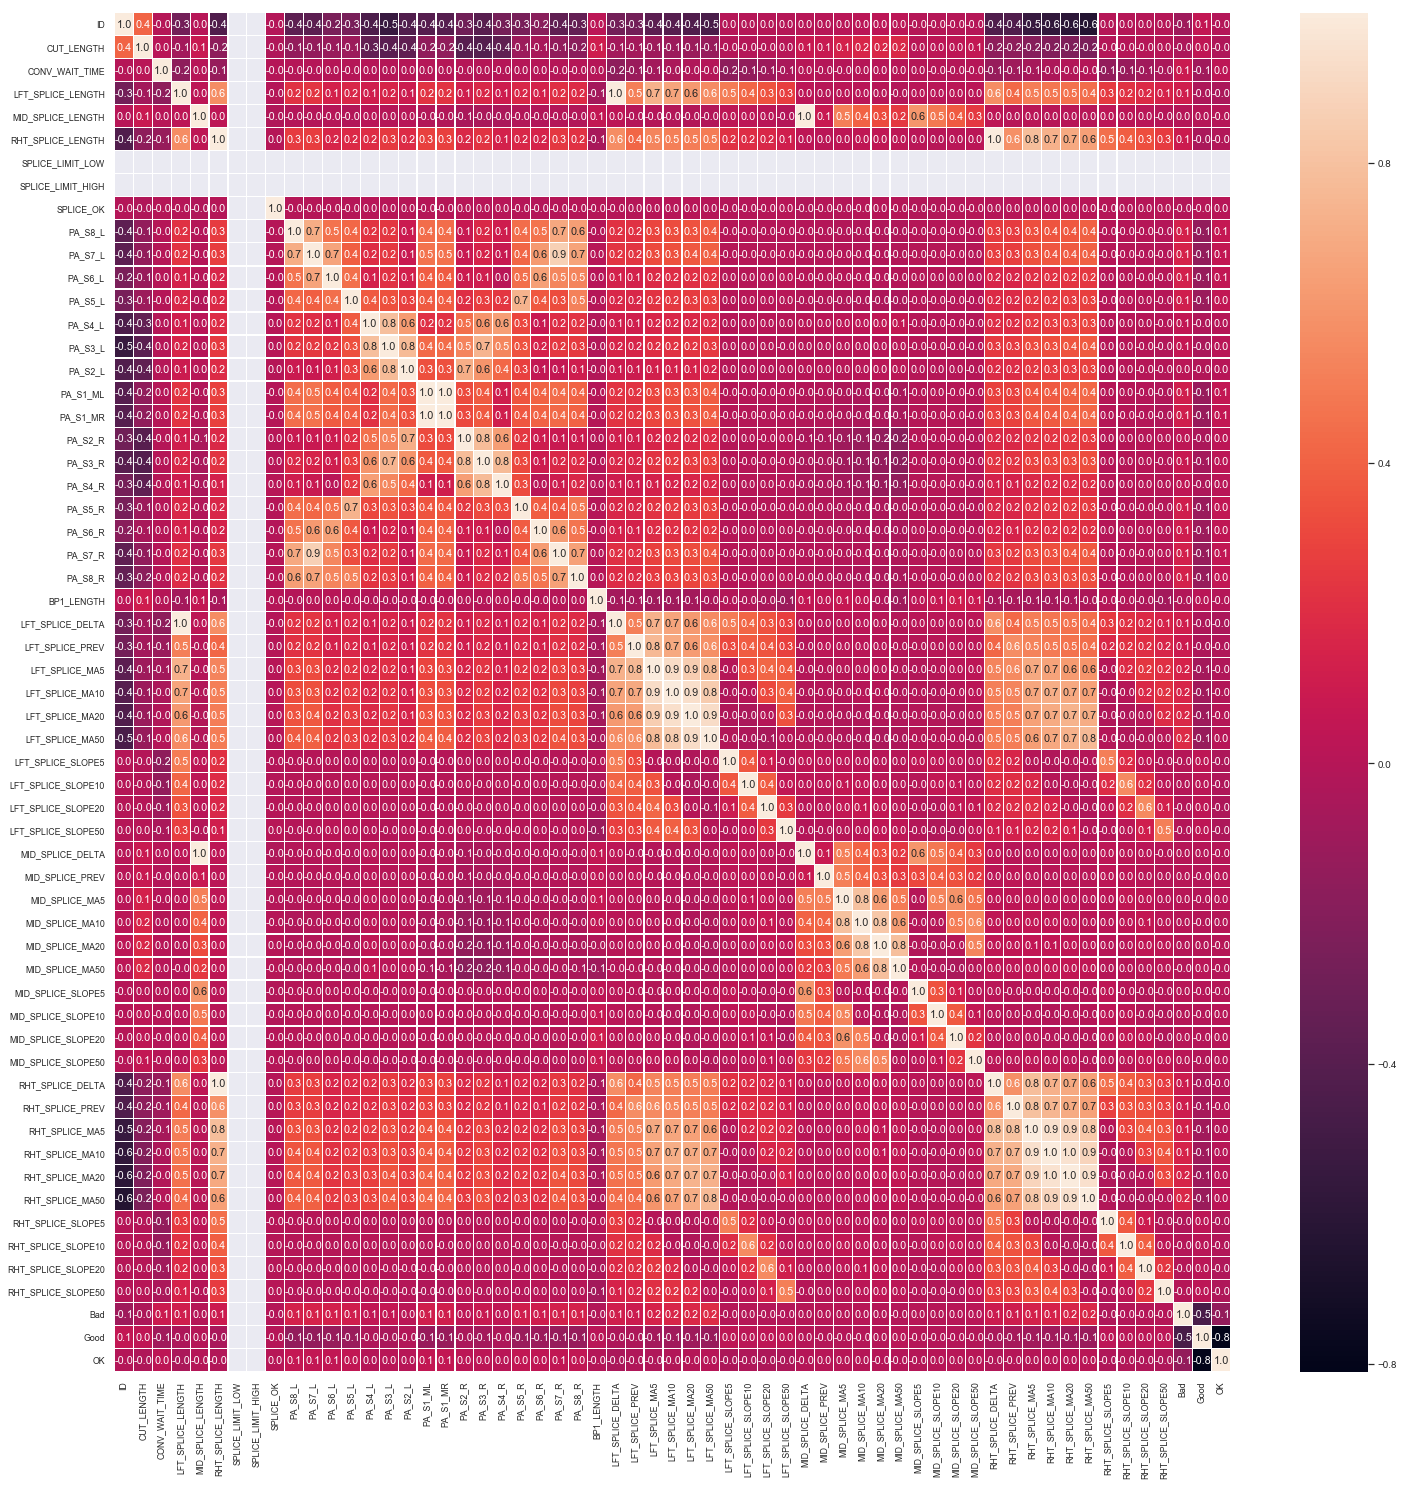

In [52]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.9)
sns.heatmap(df_pa.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()

In [53]:
#from bokeh.charts import HeatMap, bins, output_file, show, vplot
#hm1 = HeatMap(autompg, x=bins('mpg'), y=bins('displ'))

df_pa.shape

(121453, 67)

In [54]:
#from scipy import stats
#df_pa[(np.abs(stats.zscore(df_pa)) < 3).all(axis=1)]

In [55]:
df_pa.shape

(121453, 67)

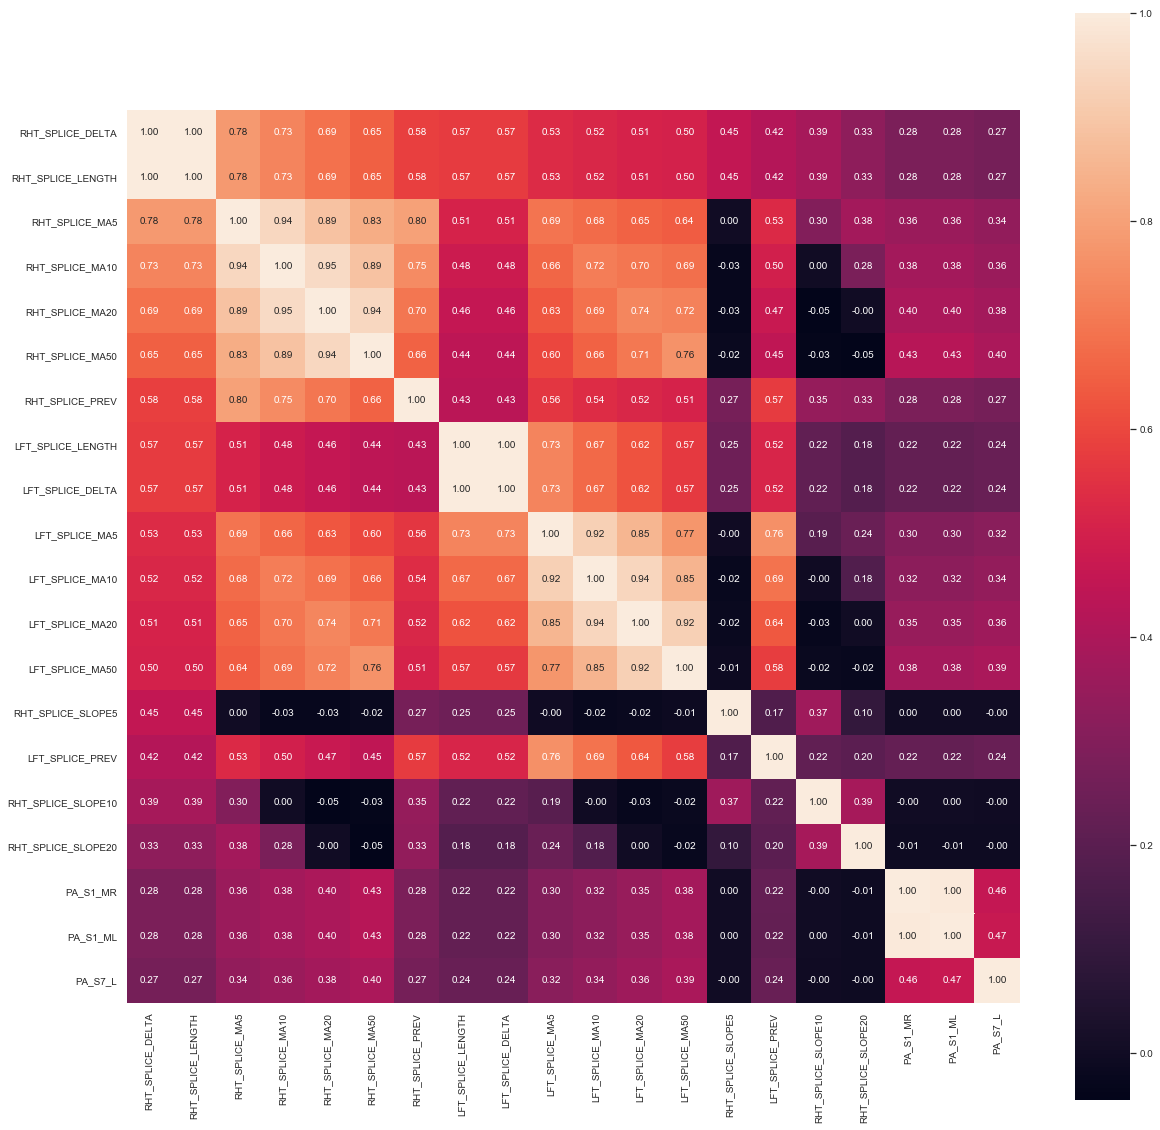

In [56]:
# correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'RHT_SPLICE_DELTA')['RHT_SPLICE_DELTA'].index
cm = np.corrcoef(df_pa[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

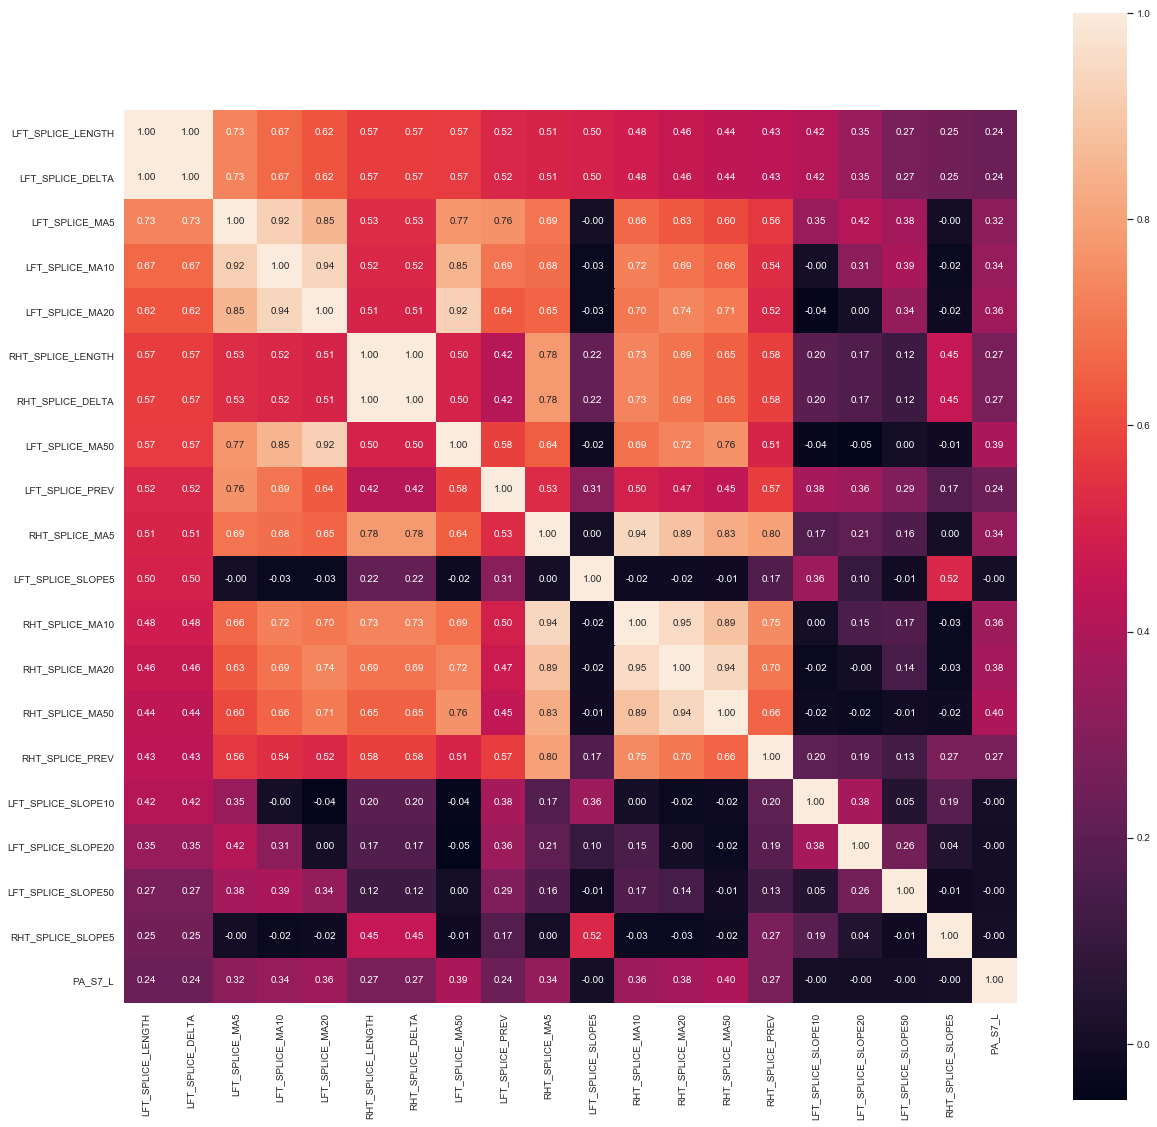

In [57]:
# correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LFT_SPLICE_DELTA')['LFT_SPLICE_DELTA'].index
cm = np.corrcoef(df_pa[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [58]:
#scatterplot
#sns.set()
#sns.pairplot(df_pa, size = 2.5)
#plt.show();

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

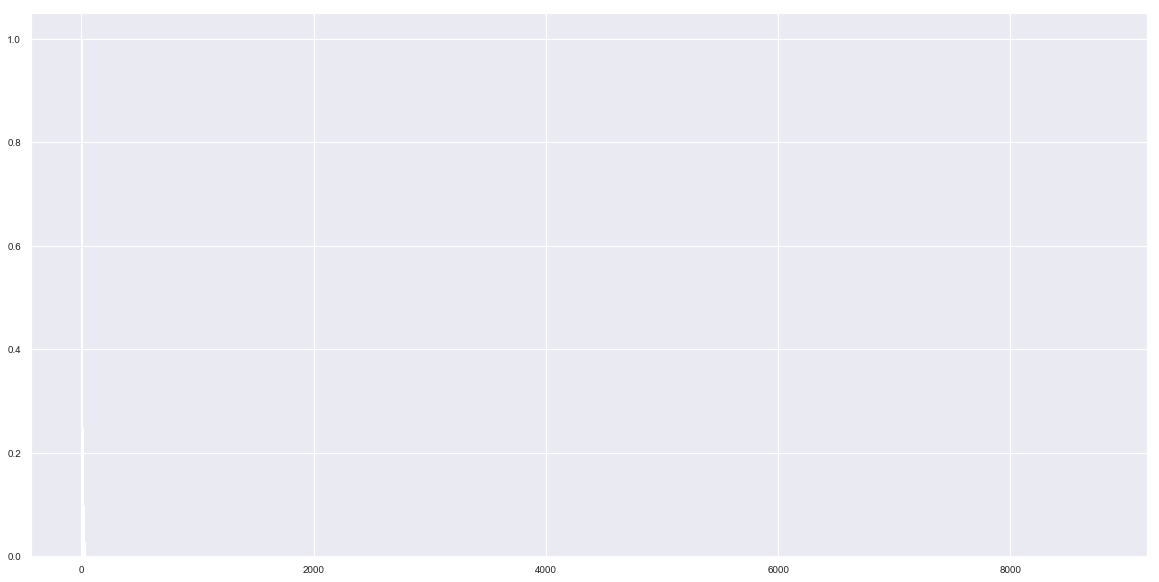

In [59]:
#v = meta[(meta.level == 'interval') & (meta.keep)].index

#for f in v:
#    plt.figure()
#    fig, ax = plt.subplots(figsize=(20,10))
#    # Calculate the percentage of target=1 per category value
#    cat_perc = df_pa[[f, 'SPLICE_OK']].groupby([f],as_index=False).mean()
#    cat_perc.sort_values(by='SPLICE_OK', ascending=False, inplace=True)
#    # Bar plot
#    # Order the bars descending on target mean
#    barplot = sns.barplot(ax=ax, x=f, y='SPLICE_OK', data=cat_perc, order=cat_perc[f])
#    for item in barplot.get_xticklabels():
#        item.set_rotation(90)
#    
#    plt.ylabel('% SPLICE_OK', fontsize=18)
#    plt.xlabel(f, fontsize=18)
#    plt.tick_params(axis='both', which='major', labelsize=18)
#
#    plt.savefig(f+'_CNAct.png')
#    plt.show();
    


In [ ]:
#scatterplot
sns.set()
sns.pairplot(df_pa, size = 2.5)
plt.show();

In [ ]:
sns.pairplot(df_pa, size = 2.5, hue = 'SPLICE_OK')